In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Improtação dos datasets que serão utilizados
df_1 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/dev.csv')
df_2 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/test%20(1).csv')
df_3 = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/sexism_analysis/refs/heads/main/datasets/train%20(2).csv')

In [4]:
# Concatenação dos dataframes
df = pd.concat([df_1, df_2, df_3])
df.head()

,rewire_id,text,label_sexist,label_category,label_vector,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,none,none,dev
1,sexism2022_english-966,I bet she wished she had a gun,not sexist,none,none,dev
2,sexism2022_english-3553,I agree with that but at the same time I know ...,sexist,2. derogation,2.1 descriptive attacks,dev
3,sexism2022_english-13328,democrats from Minnesota (leftist muzzie shith...,sexist,2. derogation,2.2 aggressive and emotive attacks,dev
4,sexism2022_english-81,Texas jury sentences Jordanian immigrant to de...,not sexist,none,none,dev


In [5]:
# Informações sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rewire_id       20000 non-null  object
 1   text            20000 non-null  object
 2   label_sexist    20000 non-null  object
 3   label_category  20000 non-null  object
 4   label_vector    20000 non-null  object
 5   split           20000 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


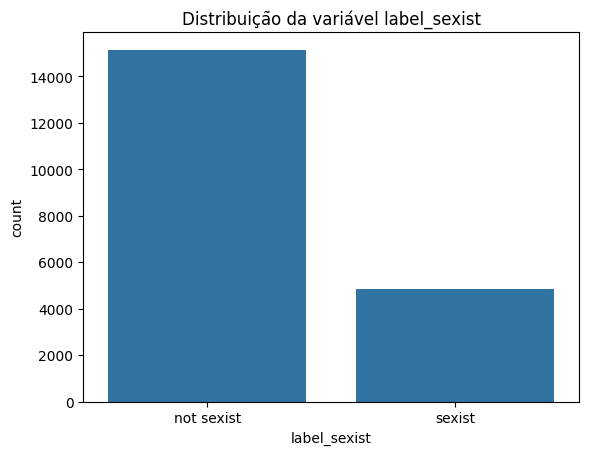

In [6]:
# verificação do da classificação das sentenças
sns.countplot(data=df, x='label_sexist')
plt.title('Distribuição da variável label_sexist')
plt.show()

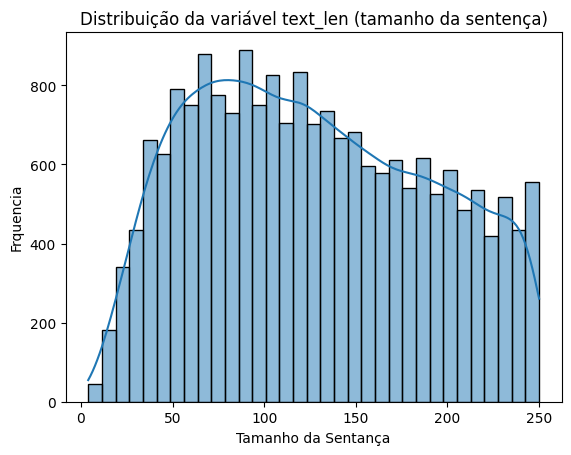

In [7]:
# verificação do tamanho das sentenças
df['text_len'] = df['text'].str.len()
sns.histplot(df['text_len'], kde=True)
plt.title('Distribuição da variável text_len (tamanho da sentença)')
plt.xlabel("Tamanho da Sentança")
plt.ylabel("Frquencia")
plt.show()

In [8]:
# Vetorização do dataframe
vetorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')

X = vetorizer.fit_transform(df['text'])
df_vectorized = pd.DataFrame(X.toarray(), columns=vetorizer.get_feature_names_out())

df_vectorized.head()

,000,10,10 10,10 minutes,10 year,10 years,100,100 years,1000,101,...,youre,youth,youtube,yr,yr old,yrs,yup,zero,zionist,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Label Encoding
encoder = LabelEncoder()
dados_encodados = encoder.fit_transform(df['label_sexist'])

In [10]:
# Divisão dos conjuntos de dados
X_train, X_test, y_train, y_test = train_test_split(df_vectorized, dados_encodados, test_size=0.2, random_state=42)

In [11]:
# Treinamento do modelo
randomForest = RandomForestClassifier()
randomForest.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# Avaliação do modelo
y_pred = randomForest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8325
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      3028
           1       0.84      0.38      0.53       972

    accuracy                           0.83      4000
   macro avg       0.84      0.68      0.71      4000
weighted avg       0.83      0.83      0.81      4000

